In [2]:
import util
import copy
import numpy as np
from matplotlib import pyplot as plt
from keep_default_optimizer import KeepDefaultOpt
from grid_search_optimizer import GridSearchOpt
import os
from tune_util import get_vacbo_optimizer
import pickle 
%load_ext autoreload
%autoreload 2

In [3]:
with open('./result/twod_gp_min_16_30_12-Mar_05_2023.pkl', 'rb') as pickle_file:
#with open('./result/discomfort_constrained_energy_min_05_02_09-Nov_26_2022.pkl', 'rb') as pickle_file:
    content = pickle.load(pickle_file)

opt_obj_list_pdcbo_list, constraints1_list_pdcbo_list, \
evaluated_points_list_pdcbo_list, \
contexts_list_pdcbo_list, \
cond_min_list_pdcbo_list, \
opt_obj_list_cbo_list, \
constraints1_list_cbo_list, evaluated_points_list_cbo_list, contexts_list_cbo_list, \
cond_min_list_cbo_list, \
opt_obj_list_safebo_list, \
constraints1_list_safebo_list, \
evaluated_points_list_safebo_list, \
contexts_list_safebo_list, \
cond_min_list_safebo_list = content

dynamic_regret_list_pdcbo_list = [[opt_obj_list_pdcbo_list[traj_id][k] - cond_min_list_pdcbo_list[traj_id][k] for k in range(len(opt_obj_list_pdcbo_list[traj_id]))] 
                                  for traj_id in range(len(opt_obj_list_pdcbo_list))
                                 ]
dynamic_regret_list_cbo_list = [[opt_obj_list_cbo_list[traj_id][k] - cond_min_list_cbo_list[traj_id][k] for k in range(len(opt_obj_list_cbo_list[traj_id]))] 
                                for traj_id in range(len(opt_obj_list_cbo_list))
                               ]
dynamic_regret_list_safebo_list = [[-opt_obj_list_safebo_list[traj_id][k] - cond_min_list_safebo_list[traj_id][k] for k in range(len(opt_obj_list_safebo_list[traj_id]))]
                                  for traj_id in range(len(opt_obj_list_safebo_list))
                                  ]

cumu_dynamic_regret_list_pdcbo_list = np.cumsum(dynamic_regret_list_pdcbo_list, axis=1)
cumu_dynamic_regret_list_cbo_list = np.cumsum(dynamic_regret_list_cbo_list, axis=1)
cumu_dynamic_regret_list_safebo_list = np.cumsum(dynamic_regret_list_safebo_list, axis=1)

cumu_dynamic_regret_list_pdcbo_list_mean = np.mean(cumu_dynamic_regret_list_pdcbo_list, axis=0)
cumu_dynamic_regret_list_cbo_list_mean = np.mean(cumu_dynamic_regret_list_cbo_list, axis=0)
cumu_dynamic_regret_list_safebo_list_mean = np.mean(cumu_dynamic_regret_list_safebo_list, axis=0)

cumu_dynamic_regret_list_pdcbo_list_std = np.std(cumu_dynamic_regret_list_pdcbo_list, axis=0)
cumu_dynamic_regret_list_cbo_list_std = np.std(cumu_dynamic_regret_list_cbo_list, axis=0)
cumu_dynamic_regret_list_safebo_list_std = np.std(cumu_dynamic_regret_list_safebo_list, axis=0)

cumu_constraints1_list_pdcbo_list = np.cumsum(constraints1_list_pdcbo_list, axis=1)
cumu_constraints1_list_cbo_list = np.cumsum(constraints1_list_cbo_list, axis=1)
cumu_constraints1_list_safebo_list = np.cumsum(constraints1_list_safebo_list, axis=1)

cumu_constraints1_list_pdcbo_list_mean = np.mean(cumu_constraints1_list_pdcbo_list, axis=0)
cumu_constraints1_list_cbo_list_mean = np.mean(cumu_constraints1_list_cbo_list, axis=0)
cumu_constraints1_list_safebo_list_mean = np.mean(cumu_constraints1_list_safebo_list, axis=0)

cumu_constraints1_list_pdcbo_list_std = np.std(cumu_constraints1_list_pdcbo_list, axis=0)
cumu_constraints1_list_cbo_list_std = np.std(cumu_constraints1_list_cbo_list, axis=0)
cumu_constraints1_list_safebo_list_std = np.std(cumu_constraints1_list_safebo_list, axis=0)



dynamic_regret_mean_pdcbo = np.mean(dynamic_regret_list_pdcbo_list, axis=0)
dynamic_regret_mean_cbo = np.mean(dynamic_regret_list_cbo_list, axis=0)
dynamic_regret_mean_safebo = np.mean(dynamic_regret_list_safebo_list, axis=0)

constraints1_list_pdcbo = np.mean(constraints1_list_pdcbo_list, axis=0)
constraints1_list_cbo = np.mean(constraints1_list_cbo_list, axis=0)
constraints1_list_safebo = np.mean(constraints1_list_safebo_list, axis=0)

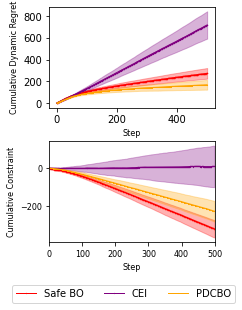

In [17]:
MARKERSIZE = 1.5 * 0.4 * 0.1
colors = ['red','purple', 'orange', 'green', 'blue', 'black', 'blue']
marksCur = ['o','s', '*', 'v', '^','+']
my_color = 'black' #'c'
MS_ratio = 0.1
from fig_hp import *
def plot_with_shade_area(ax, x, y, yerr, **kwargs):
    y = np.squeeze(y)
    yerr = np.squeeze(yerr)
    aver_line, = ax.plot(x, y,markersize=MARKERSIZE*MS_ratio, linewidth=LINEWIDTH, color=kwargs['color'], marker=kwargs['marker'], markerfacecolor='None')
    aver_region = ax.fill_between(x, y-yerr, y+yerr, alpha=0.3,color=kwargs['color'])
    return aver_line, aver_region

if True:
    total_steps = 500
    step_arr = np.arange(total_steps)
    
    %matplotlib inline
    #from matplotlib import rc
    #plt.rc('text',usetex=False)
   

    
    fig, axes = plt.subplots(2, 1)
    fig.set_size_inches(WIDTH * 1.0, HEIGHT * 2.3)

    fig.subplots_adjust(left=.22, bottom=.20, right=.99, top=.97, hspace=0.33, wspace=0.4) 
   
    ax = axes[0]
    BETA1 = 0.5
    safe_line, _ = plot_with_shade_area(ax, step_arr, cumu_dynamic_regret_list_safebo_list_mean, BETA1*cumu_dynamic_regret_list_safebo_list_std,
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None', markersize=MARKERSIZE)
    cei_line, _ = plot_with_shade_area(ax, step_arr, cumu_dynamic_regret_list_cbo_list_mean, BETA1*cumu_dynamic_regret_list_cbo_list_std,
                         linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    pdcbo_line, _ = plot_with_shade_area(ax, step_arr, cumu_dynamic_regret_list_pdcbo_list_mean, BETA1*cumu_dynamic_regret_list_pdcbo_list_std, 
                         linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None', markersize=MARKERSIZE)
   
    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.tick_params(axis='x', colors=my_color)
    ax.tick_params(axis='y', colors=my_color)
    ax.set_xlabel('Step', fontsize=LABELSIZE, color=my_color)
    ax.set_ylabel('Cumulative Dynamic Regret', fontsize=LABELSIZE, color=my_color)  
    plt.xlim((0, total_steps))

    #ax.legend(['CEI', 'Safe BO', 'Primal-Dual', 'LCB2'])
    
    ax = axes[1]

    #phi_line = ax.plot(con_bo_vio, linewidth=LINEWIDTH, color=colors[-1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    BETA2 = 0.5
    plot_with_shade_area(ax, step_arr, -cumu_constraints1_list_safebo_list_mean, BETA2*cumu_constraints1_list_safebo_list_std, 
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None')
    plot_with_shade_area(ax, step_arr, cumu_constraints1_list_cbo_list_mean, BETA2*cumu_constraints1_list_cbo_list_std,
                        linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None')
    plot_with_shade_area(ax, step_arr, cumu_constraints1_list_pdcbo_list_mean, BETA2*cumu_constraints1_list_pdcbo_list_std,
                        linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None')
    #plot_with_shade_area(ax, step_arr, epbo_vio_1, BETA2*epbo_vio_sd_1,
    #                    linewidth=LINEWIDTH, color=colors[4], marker=marksCur[4], markerfacecolor='None')
    
    plt.xlim((0, 500))
    ax.legend([safe_line, cei_line, pdcbo_line], ['Safe BO', 'CEI', 'PDCBO'], loc='lower center', bbox_to_anchor=(0.2, -0.65, 0.5, 0.5),
             ncol=3)

    plt.xticks(fontsize=LABELSIZE, color=my_color)
    plt.yticks(fontsize=LABELSIZE, color=my_color)
    ax.set_xlabel('Step', fontsize=LABELSIZE, color=my_color)
    ax.set_ylabel('Cumulative Constraint', fontsize=LABELSIZE, color=my_color)
    #ax.set_xscale('log')
    #ax.set_title('The Second Contextual Variable', fontsize=LABELSIZE)
    #ax.set_ylim(0, 0.2)
    #lgd = plt.legend(['', ''], loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=1, prop={'size': LABELSIZE})
    #fig.set_size_inches(WIDTH, HEIGHT)

    #lgd = fig.legend((aver_line[0], adv_line[0]), ('Average', 'Adversarial'), 
    #                 loc='upper right', bbox_to_anchor=(0.78, 0.1), ncol=3, prop={'size': LABELSIZE})

    import tikzplotlib
    tikzplotlib.clean_figure()
    tikzplotlib.save('./fig/cumu_dyr_and_constraints.tex')
    plt.savefig('./fig/cumu_dyr_and_constraints.pdf', format='pdf', bbox_inches='tight')
    # plt.savefig(f'./fig/sample_funcs_r_and_v.pdf', format='pdf', bbox_inches='tight')
    
    plt.show()  
   
#plot_cumu_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
#                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists,
#                epbo_regret_lists_2, epbo_constrs_lists_2, epbo_regret_lists_3, epbo_constrs_lists_3)


In [11]:
safe_bo_cumu_reg = cumu_dynamic_regret_list_safebo_list_mean[-1]
pdcbo_cumu_reg = cumu_dynamic_regret_list_pdcbo_list_mean[-1]
(safe_bo_cumu_reg-pdcbo_cumu_reg)/pdcbo_cumu_reg

0.6172086528693974

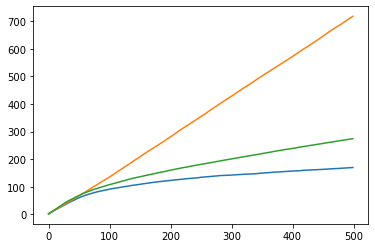

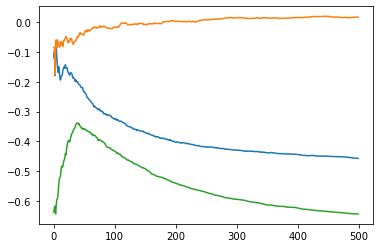

In [13]:
# plt.plot(np.cumsum(opt_obj_list_pdcbo))
plt.plot(np.cumsum(dynamic_regret_mean_pdcbo))
#plt.figure()
#plt.plot(np.cumsum(constraints1_list_pdcbo)/(np.arange(len(constraints1_list_pdcbo))+1))

#plt.figure()
#plt.plot(np.cumsum(opt_obj_list_cbo))
plt.plot(np.cumsum(dynamic_regret_mean_cbo))
#plt.figure()
#plt.plot(np.cumsum(constraints1_list_cbo)/(np.arange(len(constraints1_list_cbo))+1))


#plt.figure()
#plt.plot(-np.cumsum(opt_obj_list_safebo))
plt.plot(np.cumsum(dynamic_regret_mean_safebo))
plt.figure()

plt.plot(np.cumsum(constraints1_list_pdcbo)/(np.arange(len(constraints1_list_pdcbo))+1))
plt.plot(np.cumsum(constraints1_list_cbo)/(np.arange(len(constraints1_list_cbo))+1))
plt.plot(-np.cumsum(constraints1_list_safebo)/(np.arange(len(constraints1_list_safebo))+1))

In [21]:
contexts_list_pdcbo

[4.399999999999999,
 -8.0,
 8.799999999999997,
 3.200000000000001,
 1.5999999999999996,
 -2.4000000000000004,
 5.199999999999999,
 -3.5999999999999996,
 9.2,
 -2.8000000000000007,
 -4.0,
 1.200000000000001,
 5.199999999999999,
 4.0,
 -1.1999999999999993,
 -7.6,
 5.600000000000001,
 -7.199999999999999,
 8.799999999999997,
 -0.7999999999999989,
 7.600000000000001,
 0.8000000000000007,
 -3.1999999999999993,
 -9.6,
 -3.5999999999999996,
 -8.4,
 2.8000000000000007,
 -1.1999999999999993,
 -5.6,
 3.6000000000000014,
 -1.5999999999999996,
 -4.8,
 -10.0,
 -4.8,
 2.8000000000000007,
 -5.6,
 -6.8,
 -2.8000000000000007,
 4.800000000000001,
 -3.5999999999999996,
 -4.3999999999999995,
 -3.5999999999999996,
 3.200000000000001,
 -0.40000000000000036,
 -4.3999999999999995,
 -2.8000000000000007,
 -9.2,
 -7.199999999999999,
 -7.199999999999999,
 7.600000000000001]

In [23]:
config = util.get_sample_GP_two_dim_config('gp2d')

Start sampling functions.
  rbf.         |  value  |  constraints  |  priors
  variance     |    2.0  |      +ve      |        
  lengthscale  |   (2,)  |      +ve      |         0.01
  rbf.         |  value  |  constraints  |  priors
  variance     |    2.0  |      +ve      |        
  lengthscale  |   (2,)  |      +ve      |         0.01
  rbf.         |  value  |  constraints  |  priors
  variance     |    2.0  |      +ve      |        
  lengthscale  |   (2,)  |      +ve      |         0.01
  rbf.         |  value  |  constraints  |  priors
  variance     |    2.0  |      +ve      |        
  lengthscale  |   (2,)  |      +ve      |         0.01
  rbf.         |  value  |  constraints  |  priors
  variance     |    2.0  |      +ve      |        
  lengthscale  |   (2,)  |      +ve      |         0.01
  rbf.         |  value  |  constraints  |  priors
  variance     |    2.0  |      +ve      |        
  lengthscale  |   (2,)  |      +ve      |         0.01
Functions sampled.
[0.0, 0

In [33]:
config['get_context'](step=2)

(6.0, -2.1553277245148785)